# MNIST 데이터셋 가져오기

In [1]:
# https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5706504.07it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 393882.14it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2768459.48it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10079644.85it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# 여러 장의 이미지 시각화 하기

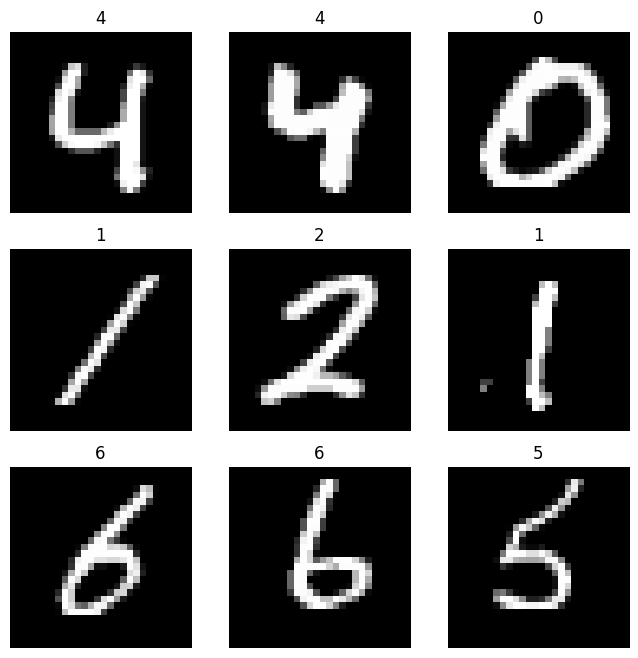

In [2]:
figure = plt.figure(figsize=(8, 8))

n = 3
cols, rows = n, n
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# 가져온 이미지를 데이터 로더에 로딩하기

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# 데이터 로더로 부터 이미지 한 장씩 꺼내오기

In [4]:
x, y = next(iter(train_dataloader))
print(x.shape)
print(y.shape)
print(y)

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([3, 5, 8, 3, 4, 4, 1, 4, 6, 2, 6, 3, 8, 7, 6, 3, 7, 8, 4, 6, 8, 4, 7, 9,
        7, 1, 2, 0, 3, 0, 5, 4, 9, 1, 3, 1, 6, 8, 2, 4, 7, 5, 0, 1, 4, 7, 1, 3,
        3, 5, 7, 0, 0, 4, 7, 7, 4, 4, 2, 0, 4, 0, 9, 4])


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


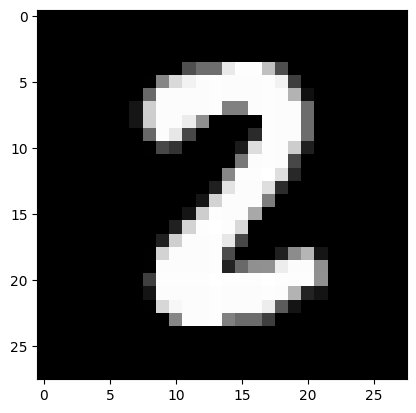

Label: 2


In [5]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 사이즈 변경

In [16]:
imgPath = "/content/cat.jpg"

(512, 512)


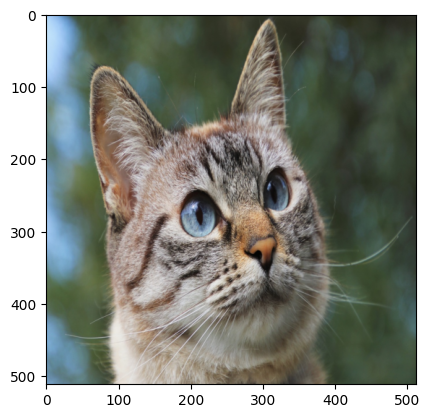

In [27]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        #transforms.ToTensor()
    ]
)

image = Image.open(imgPath)
transformed_image = transform(image)#.permute(1, 2, 0)
print(transformed_image.size)
plt.imshow(transformed_image)

torch.Size([857, 1280, 3])


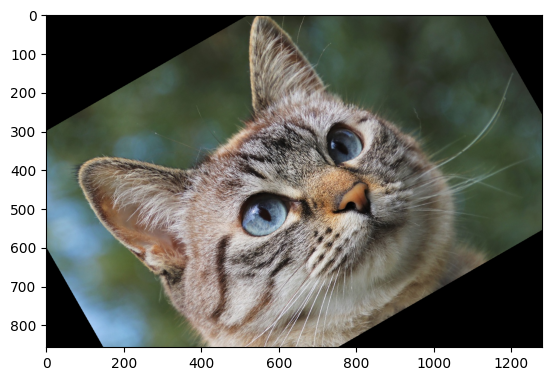

In [28]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor()
    ]
)

image = Image.open(imgPath)
transformed_image = transform(image).permute(1,2,0)
print(transformed_image.shape)
plt.imshow(transformed_image)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# 1. 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST 데이터셋 로드 (train/test)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader 생성 (train/test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [ ]:
# 2. 모델 정의
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)  # 입력 차원은 28x28 (이미지 크기)
        self.fc2 = nn.Linear(512, 256)    # 두 번째 히든 레이어
        self.fc3 = nn.Linear(256, 10)     # 출력 레이어 (10개의 클래스, 0~9 숫자)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 입력 이미지를 1D 벡터로 변환
        x = F.relu(self.fc1(x))  # 첫 번째 레이어에 ReLU 적용
        x = F.relu(self.fc2(x))  # 두 번째 레이어에 ReLU 적용
        x = self.fc3(x)          # 출력 레이어
        return x

In [ ]:
# 2. 모델 정의 (히든 레이어 3개 추가)
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)  # 첫 번째 히든 레이어
        self.fc2 = nn.Linear(512, 512)    # 두 번째 히든 레이어
        self.fc3 = nn.Linear(512, 256)    # 세 번째 히든 레이어
        self.fc4 = nn.Linear(256, 128)    # 네 번째 히든 레이어
        self.fc5 = nn.Linear(128, 64)     # 다섯 번째 히든 레이어
        self.fc6 = nn.Linear(64, 10)      # 출력 레이어 (10개의 클래스)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 입력 이미지를 1D 벡터로 변환
        x = F.relu(self.fc1(x))  # 첫 번째 레이어에 ReLU 적용
        x = F.relu(self.fc2(x))  # 두 번째 레이어에 ReLU 적용
        x = F.relu(self.fc3(x))  # 세 번째 레이어에 ReLU 적용
        x = F.relu(self.fc4(x))  # 네 번째 레이어에 ReLU 적용
        x = F.relu(self.fc5(x))  # 다섯 번째 레이어에 ReLU 적용
        x = self.fc6(x)          # 출력 레이어 (logits)
        return x

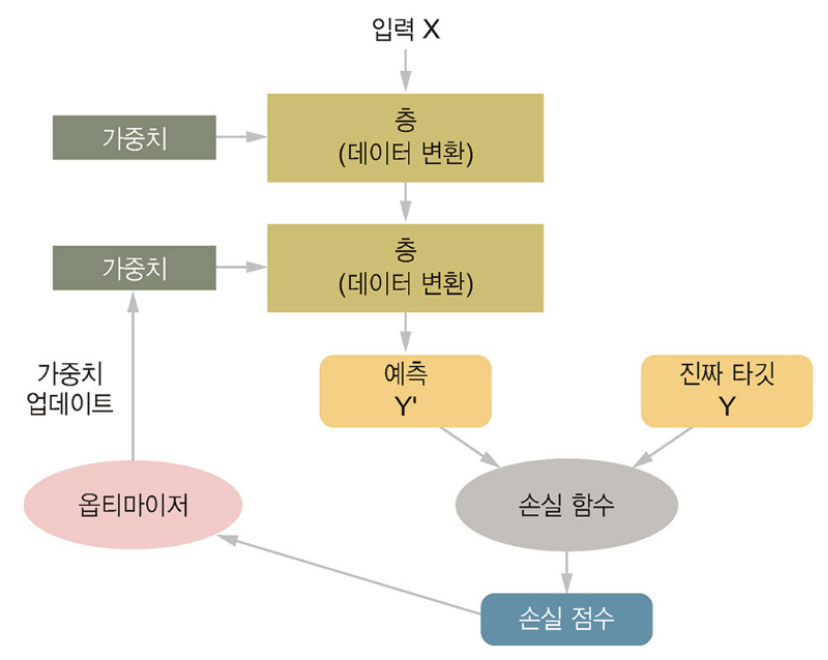

In [ ]:
# 3. 모델, 손실 함수, 옵티마이저 설정
model = Net2()
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 모델 학습
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()       # 이전의 gradient를 초기화
        output = model(data)        # 모델에 입력 데이터 전달하여 출력 계산
        loss = criterion(output, target)  # 손실 계산
        loss.backward()             # 역전파로 gradient 계산
        optimizer.step()            # 가중치 업데이트

        running_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Batch [{batch_idx}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

In [ ]:
# 5. 모델 평가
model.eval()  # 평가 모드로 전환
correct = 0
total = 0
with torch.no_grad():  # 평가 시에는 gradient를 계산하지 않음
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
import matplotlib.pyplot as plt

num = 9
figsize = (3+num, 3+num)

# 5. 모델 평가
model.eval()  # 평가 모드로 전환
correct = 0
total = 0
misclassified_images = []  # 잘못 예측된 이미지 저장용 리스트
misclassified_labels = []  # 실제 레이블 저장
misclassified_predictions = []  # 잘못 예측된 레이블 저장

with torch.no_grad():  # 평가 시에는 gradient를 계산하지 않음
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

        # 잘못 예측된 이미지를 저장
        for i in range(data.size(0)):
            if predicted[i] != target[i]:
                misclassified_images.append(data[i].cpu().numpy())  # 이미지 저장
                misclassified_labels.append(target[i].cpu().item())  # 실제 라벨 저장
                misclassified_predictions.append(predicted[i].cpu().item())  # 예측 라벨 저장

# 정확도 출력
accuracy = correct / total
print('Total:{}, correct:{}'.format(total,correct))
print(f'Test Accuracy: {accuracy:.4f}')

# 잘못 예측된 이미지 시각화 (최대 16개)
num_misclassified = len(misclassified_images)
num_to_display = min(num_misclassified, num*num)  # 최대 9개만 표시



if num_to_display > 0:
    fig, axes = plt.subplots(num, num, figsize=figsize)  # 3x3 형태의 플롯 생성
    for i in range(num_to_display):
        ax = axes[i // num, i % num]  # numxnum grid에서 위치 계산
        image = misclassified_images[i].squeeze()  # 이미지를 가져오고 차원 축소
        ax.imshow(image, cmap='gray')  # 이미지 표시
        ax.set_title(f'True: {misclassified_labels[i]}, Pred: {misclassified_predictions[i]}')
        ax.axis('off')  # 축 숨기기

    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images to display.")